In [1]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.4 MB/s eta 0:00:00


# Importação das bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

# Carregamento da base de dados


In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning e Data Science com Python de A a Z/Bases de dados/AirPassengers.csv')
dataset.sample(6)

,Month,#Passengers
129,1959-10,407
31,1951-08,199
52,1953-05,229
128,1959-09,463
138,1960-07,622
54,1953-07,264


passageiros com base no mes ^^^^

In [6]:
# temos que converter a coluna pro esquema certo de se trabalhar com datas
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning e Data Science com Python de A a Z/Bases de dados/AirPassengers.csv', parse_dates = ['Month'], index_col = 'Month', date_parser = dateparse)
dataset.sample(6)



<ipython-input-6-c9df08f9bd12>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')


,#Passengers
Month,
1960-04-01,461
1949-05-01,121
1956-01-01,284
1952-09-01,209
1956-07-01,413
1950-04-01,135


o data set ficou com apenas uma coluna, mas essa coluna é como se fosse um dicionario, com o Month sendo o chave

# Exploração da variavel

In [8]:
dataset.shape

(144, 1)

In [7]:
time_series = dataset['#Passengers']
time_series


Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [12]:
# Pega o valor da primeira linha(valor de passageiros)
time_series[0]

112

In [11]:
time_series['1949-01-01'] # Faz a mesma coisa

112

In [14]:
time_series['1950-01-01':'1950-07-31'] # PEgar um intervalo de registro

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [15]:
time_series[:'1950-07-31'] # Do inicio ate X

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [16]:
time_series['1950'] # Traz todos os meses de 1950

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [17]:
time_series.index.max() # Ultimo registro da base de dados

Timestamp('1960-12-01 00:00:00')

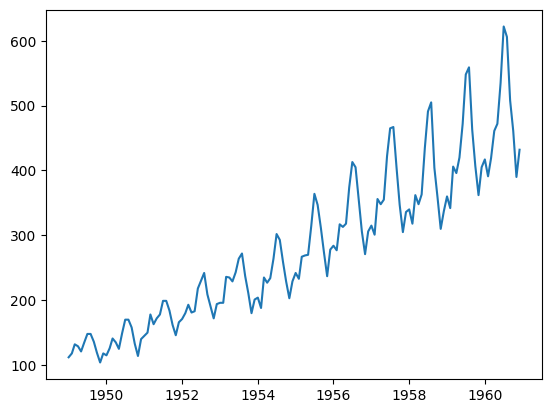

In [18]:
plt.plot(time_series)

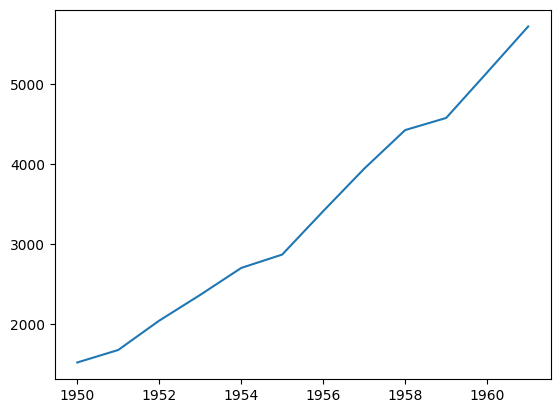

In [19]:
time_series_ano = time_series.resample('A').sum()
plt.plot(time_series_ano)

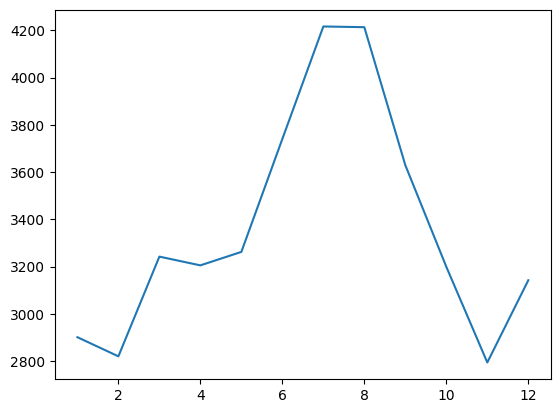

In [21]:
# Agrupamento por mes
time_series_mes = time_series.groupby([lambda x: x.month]).sum()
plt.plot(time_series_mes)
# Podemos ver que o mes de ferias no USA é o pico de passageiros

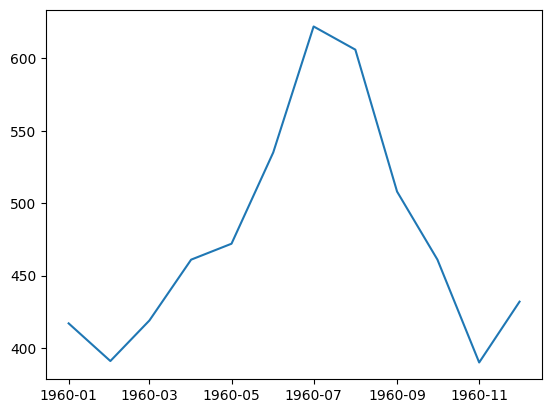

In [22]:
# Podemos ver de um certo periodo do tempo
time_series_datas = time_series['1960-01-01':'1960-12-01']
plt.plot(time_series_datas)

# Decomposição de serie temporal

In [23]:
 # A partir do decompositor, podemos analisar dados importanters como tendencias, sazonal e aleatorio
decomposicao = seasonal_decompose(time_series)
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal
aleatorio = decomposicao.resid

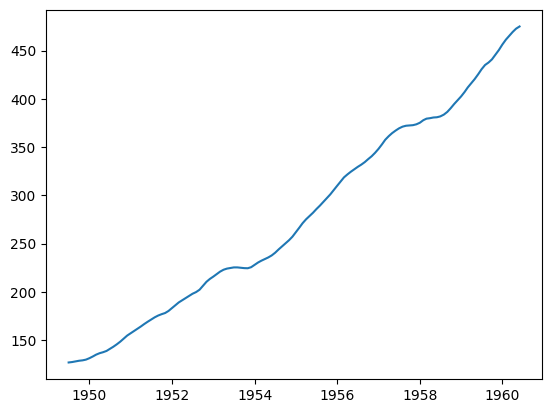

In [27]:
plt.plot(tendencia) # podemos ver que a tendencia é de crescimento linear

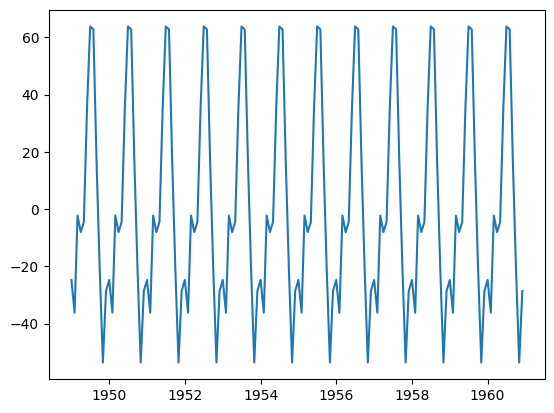

In [28]:
plt.plot(sazonal) # Podemos observar os picos durantes os anos, que sao basicamente na mesma epoca, que é de ferias

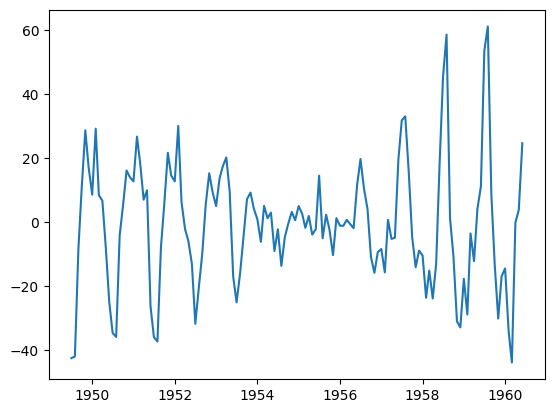

In [26]:
plt.plot(aleatorio)

Previsões com ARIMA

In [29]:
# Parâmetors P, Q e D
model = auto_arima(time_series)

In [30]:
model.order # Parametros P Q D

(4, 1, 3)

In [35]:
predictions = model.predict(n_periods=24)
predictions # Aqui vamos ter os valores de previsoes de passageiros para cada um dos proximos meses

1961-01-01    467.573736
1961-02-01    490.494460
1961-03-01    509.136849
1961-04-01    492.554702
1961-05-01    495.305965
1961-06-01    475.947817
1961-07-01    476.339865
1961-08-01    475.552147
1961-09-01    472.353805
1961-10-01    483.889647
1961-11-01    475.570149
1961-12-01    485.921508
1962-01-01    479.133602
1962-02-01    480.987421
1962-03-01    482.221399
1962-04-01    476.211021
1962-05-01    483.942815
1962-06-01    475.847349
1962-07-01    482.794250
1962-08-01    479.011953
1962-09-01    479.518625
1962-10-01    482.449447
1962-11-01    476.973939
1962-12-01    483.511016
Freq: MS, dtype: float64

# Testando o modelo

In [36]:
len(time_series)

144

In [40]:
train = time_series[:130]
test = time_series[130:]
train.shape, test.shape

((130,), (14,))

In [38]:
train.index.min(), train.index.max() # Intervalo da base de treinamento

(Timestamp('1949-01-01 00:00:00'), Timestamp('1959-10-01 00:00:00'))

In [41]:
test.index.min(), test.index.max()

(Timestamp('1959-11-01 00:00:00'), Timestamp('1960-12-01 00:00:00'))

In [42]:
model2 = auto_arima(train, suppress_warnings=True)

In [43]:
# Criamos um dataFrame com o esquema do primeirao com as previsoes que o modelo fezz
prediction = pd.DataFrame(model2.predict(n_periods=14), index=test.index)
prediction.columns = ['passengers_predictions']
prediction

,passengers_predictions
Month,
1959-11-01,357.690511
1959-12-01,334.857449
1960-01-01,342.488592
1960-02-01,375.944534
1960-03-01,424.126300
1960-04-01,473.151468
1960-05-01,510.388415
1960-06-01,527.724284
1960-07-01,523.268370


In [44]:
test

Month
1959-11-01    362
1959-12-01    405
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

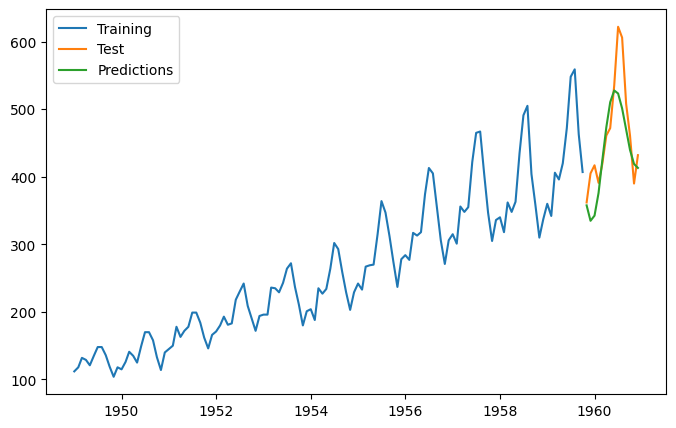

In [45]:
plt.figure(figsize=(8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Predictions')
plt.legend();